In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

rawDataset = pd.read_csv('heart_attack.csv')
rawDataset

,heart_disease,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,0,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,0,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1,57,0,4,140,241,0,0,123,1,0.2,2,0,7
293,1,45,1,1,110,264,0,0,132,0,1.2,2,0,7
294,1,68,1,4,144,193,1,0,141,0,3.4,2,2,7
295,1,57,1,4,130,131,0,0,115,1,1.2,2,1,7


In [22]:
dataset = rawDataset[['heart_disease', 'chol']].copy()
dataset

,heart_disease,chol
0,0,233
1,1,286
2,1,229
3,0,250
4,0,204
...,...,...
292,1,241
293,1,264
294,1,193
295,1,131


In [23]:
X = dataset['chol'].values.reshape(-1, 1)
y = dataset['heart_disease'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

probs = classifier.predict_proba(X_test)[:, 1]

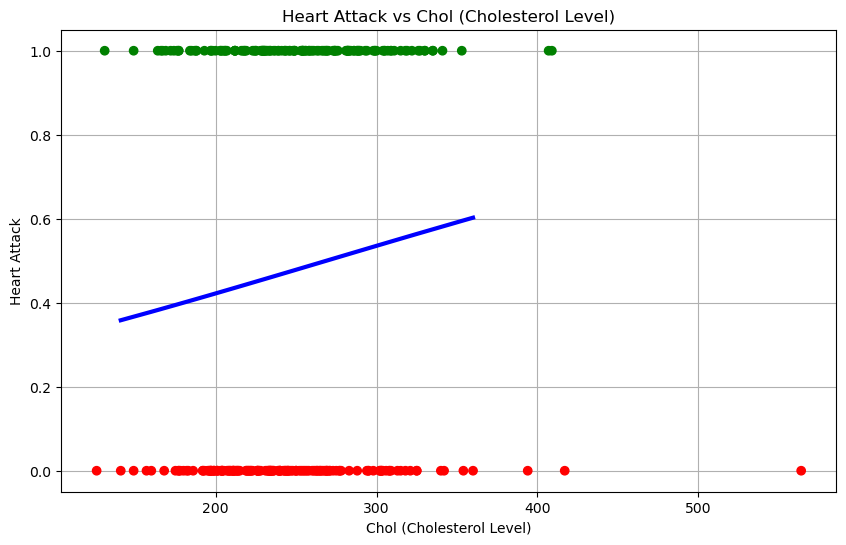

In [26]:
sorted_probs, sorted_X_test = zip(*sorted(zip(probs, X_test.flatten())))

plt.figure(figsize=(10, 6))
colors = ['red' if i == 0 else 'green' for i in y]

plt.scatter(X, y, color=colors, zorder=20)
plt.plot(sorted_X_test, sorted_probs, color='blue', lw=3)
plt.grid()
plt.xlabel('Chol (Cholesterol Level)')
plt.ylabel('Heart Attack')

plt.title('Heart Attack vs Chol (Cholesterol Level)')

plt.show()

In [41]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [61]:
#confusion matrix: Heart Attack vs thalach (Maximum Heart Rate)
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[30,  6],
       [ 9, 15]], dtype=int64)

In [62]:
#accuracy of the model: Heart Attack vs thalach (Maximum Heart Rate)
accuracy_score(y_test, y_pred)

0.75

In [63]:
#Model Equation: Heart Attack vs thalach (Maximum Heart Rate)
from sklearn.linear_model import LogisticRegression

beta_0 = classifier.intercept_[0]
beta_1 = classifier.coef_[0][0]

print(f"Model Equation: P(y=1) = 1 / (1 + e^(-({beta_0:.4f} + {beta_1:.4f} * x)))")


Model Equation: P(y=1) = 1 / (1 + e^(-(5.9611 + -0.0407 * x)))


In [67]:
def heartAttackChance(x):
    e = 2.718281828459045
    proba = 1 / (1 + e**(-(5.9611 + -0.0407 * x)))
    print('Heart attack probability: ', proba)
    
heartAttackChance(130)

Heart attack probability:  0.6615255505142638
